### Part 1

##### Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

    Choose one variable and plot that variable four different ways.
    Choose two continuous variables, and plot them three different ways.
    Choose one continuous variable and one categorical variable, and plot them six different ways.
    Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.


Data Source:
https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3

Data Description:
n October 2012, CMS began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, calculated by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack (AMI), heart failure (HF), pneumonia, chronic obstructive pulmonary disease (COPD), hip/knee replacement (THA/TKA), and coronary artery bypass graft surgery (CABG) by the number that would be “expected,” based on an average hospital with similar patients.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\Hospital_Readmissions_Reduction_Program.csv')

###### Add column with shortened Measure Name for plotting.

In [ ]:
df['Measure Name'].unique()

In [3]:
def measure_id (row):
   if row['Measure Name'] == 'READM_30_COPD_HRRP' :
      return 'COPD'
   if row['Measure Name'] == 'READM_30_HF_HRRP' :
      return 'HF'
   if row['Measure Name'] == 'READM_30_PN_HRRP' :
      return 'PN'
   if row['Measure Name'] == 'READM_30_AMI_HRRP' :
      return 'AMI'
   if row['Measure Name'] == 'READM_30_HIP_KNEE_HRRP' :
      return 'HIP_KNEE'
   if row['Measure Name'] == 'READM_30_CABG_HRRP' :
      return 'CABG'

In [4]:
df.apply (lambda row: measure_id(row), axis=1)

0             AMI
1            CABG
2            COPD
3              HF
4        HIP_KNEE
5              PN
6             AMI
7            CABG
8            COPD
9              HF
10       HIP_KNEE
11             PN
12            AMI
13           CABG
14           COPD
15             HF
16       HIP_KNEE
17             PN
18            AMI
19           CABG
20           COPD
21             HF
22       HIP_KNEE
23             PN
24            AMI
25           CABG
26           COPD
27             HF
28       HIP_KNEE
29             PN
           ...   
19644         AMI
19645        CABG
19646        COPD
19647          HF
19648    HIP_KNEE
19649          PN
19650         AMI
19651        CABG
19652        COPD
19653          HF
19654    HIP_KNEE
19655          PN
19656         AMI
19657        CABG
19658        COPD
19659          HF
19660    HIP_KNEE
19661          PN
19662         AMI
19663        CABG
19664        COPD
19665          HF
19666    HIP_KNEE
19667          PN
19668     

In [5]:
df['measure'] = df.apply (lambda row: measure_id(row), axis=1)

In [ ]:
df.head()

###### Remove missing values by converting 'Not Available' values to NaN, then dropping NaN values.

In [6]:
df_with_nans = df.applymap(lambda elem: float('NaN') if elem == "Not Available" else elem)

In [ ]:
df_with_nans.head(10)

###### Make a copy of df ( rather than a slice) to avoid errors and warnings

In [7]:
df_readmin = df_with_nans.dropna(subset=df_with_nans.columns.drop('Footnote')).copy() 

In [ ]:
df_readmin.head(5)

In [8]:
df_readmin.groupby('Measure Name')['Excess Readmission Ratio'].describe()

,count,unique,top,freq
Measure Name,,,,
READM_30_AMI_HRRP,1666,1195,1.0498,6
READM_30_CABG_HRRP,596,550,1.0562,3
READM_30_COPD_HRRP,2551,1564,1.0056,7
READM_30_HF_HRRP,2670,1760,0.9943,6
READM_30_HIP_KNEE_HRRP,1301,1141,0.8791,4
READM_30_PN_HRRP,2748,1806,1.0213,6


Why doesn't this provide mean, std, etc. 

In [ ]:
df_readmin.info()

###### Convert selected columns to numeric

In [9]:
for column in ['Number of Discharges', 'Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']:
    df_readmin[column] = pd.to_numeric(df_readmin[column], errors = 'coerce', downcast = 'float')

In [ ]:
df_readmin.info()

In [10]:
df_readmin.groupby('Measure Name')['Excess Readmission Ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
Measure Name,,,,,,,,
READM_30_AMI_HRRP,1666.0,1.005694,0.068506,0.7479,0.962050,1.00620,1.049875,1.2927
READM_30_CABG_HRRP,596.0,1.022244,0.118904,0.7428,0.940425,1.02185,1.100550,1.7072
READM_30_COPD_HRRP,2551.0,1.004937,0.062906,0.8126,0.964350,1.00220,1.041750,1.3222
READM_30_HF_HRRP,2670.0,1.003497,0.076744,0.7467,0.953625,1.00095,1.052000,1.3394
READM_30_HIP_KNEE_HRRP,1301.0,1.022134,0.153250,0.5982,0.911500,1.01080,1.116900,1.8256
READM_30_PN_HRRP,2748.0,1.004802,0.081388,0.7610,0.948400,0.99880,1.055625,1.3801


###### Choose one variable and plot that variable four different ways.
Plotting 'measure'

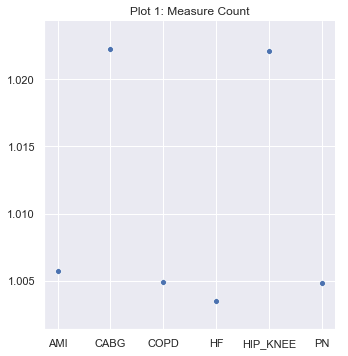

In [43]:
sns.set()
sns.relplot(data = df_readmin.groupby('measure')['Excess Readmission Ratio'].mean())
plt.title('Plot 1: Measure Count')
plt.show()

###### Pros & Cons
Plot 1 represents the mean from the summary stastics for 'Excess Readmission Ratio' of each measure. 
**Pros:** simple, easy to read
**Cons:** not very interesting; would be more effective as a table

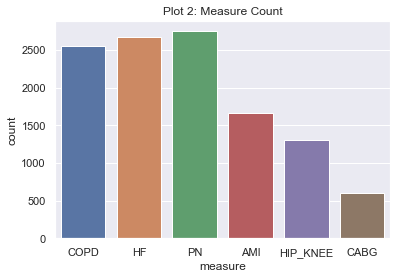

In [12]:
sns.set()
sns.countplot(x = 'measure', data = df_readmin)
plt.title('Plot 2: Measure Count')
plt.show()

###### Pros & Cons
Plot 2 a countplot, is a clear representation of the count of each measure.  
**Pros:** simple, easy to read; effective for representing 1 categorical variable

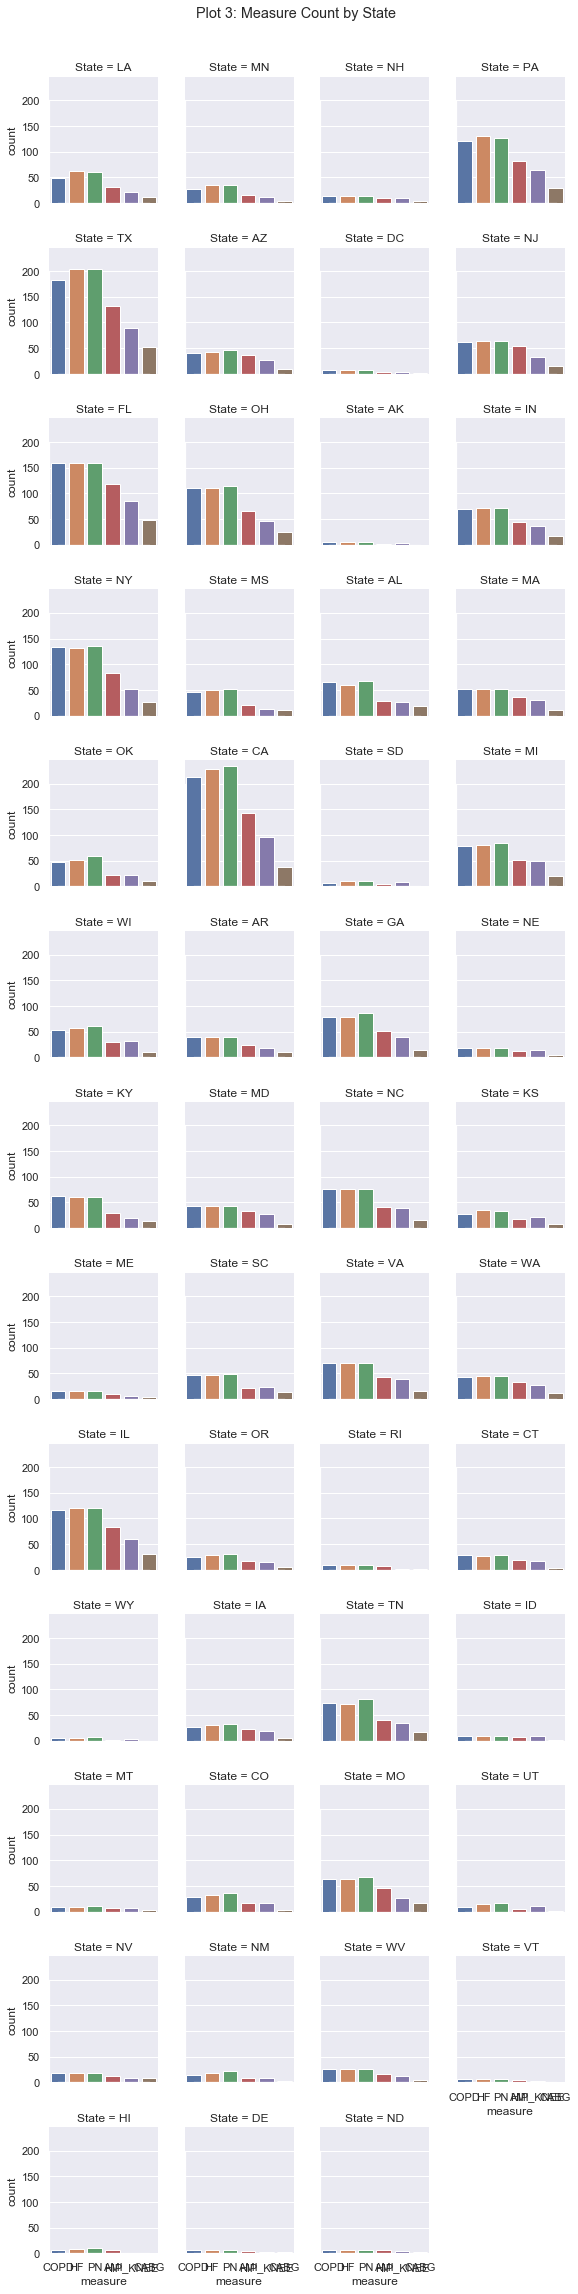

In [13]:
sns.catplot('measure', col='State', 
            col_wrap=4, data=df_readmin, 
            kind="count", height=2.5, aspect=.8)
plt.subplots_adjust(top=0.95)
plt.suptitle('Plot 3: Measure Count by State')
sns.despine(trim=True)

plt.show()

###### Pros & Cons
Plot 3, a catplot, represents count of each measure by state. 
**Cons:** less useful; too many plots; x-labels are distorted by large number of categories. 

###### Choose two continuous variables, and plot them three different ways.
Plotting 'Number of Discharges' and 'Number of Readmissions' 

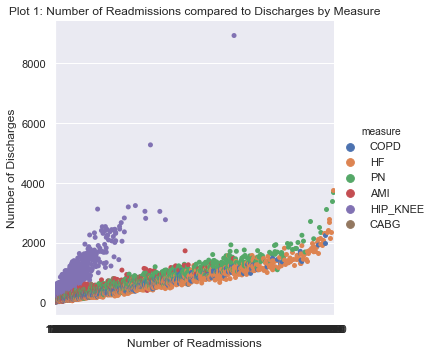

In [50]:
sns.catplot(x='Number of Readmissions', y='Number of Discharges', 
            hue = 'measure', data=df_readmin)
plt.title('Plot 1: Number of Readmissions compared to Discharges by Measure')
plt.show()

###### Pros & Cons
Plot 1: Readmissions compared to Discharges by Measure
**Pros:** effective overview; outliers are clear
**Cons:** difficult to parse out the plots for individual measures

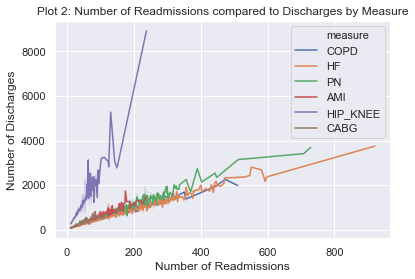

In [57]:
sns.lineplot(x='Number of Readmissions', y='Number of Discharges',
             hue = 'measure',
            data = df_readmin)
plt.title('Plot 2: Number of Readmissions compared to Discharges by Measure')
plt.show()

###### Pros & Cons
Plot 2: Readmissions compared to Discharges by Measure
**Pros:** individual measures are easier to see
**Cons:** y-scale is too broad due to outliers to give detail

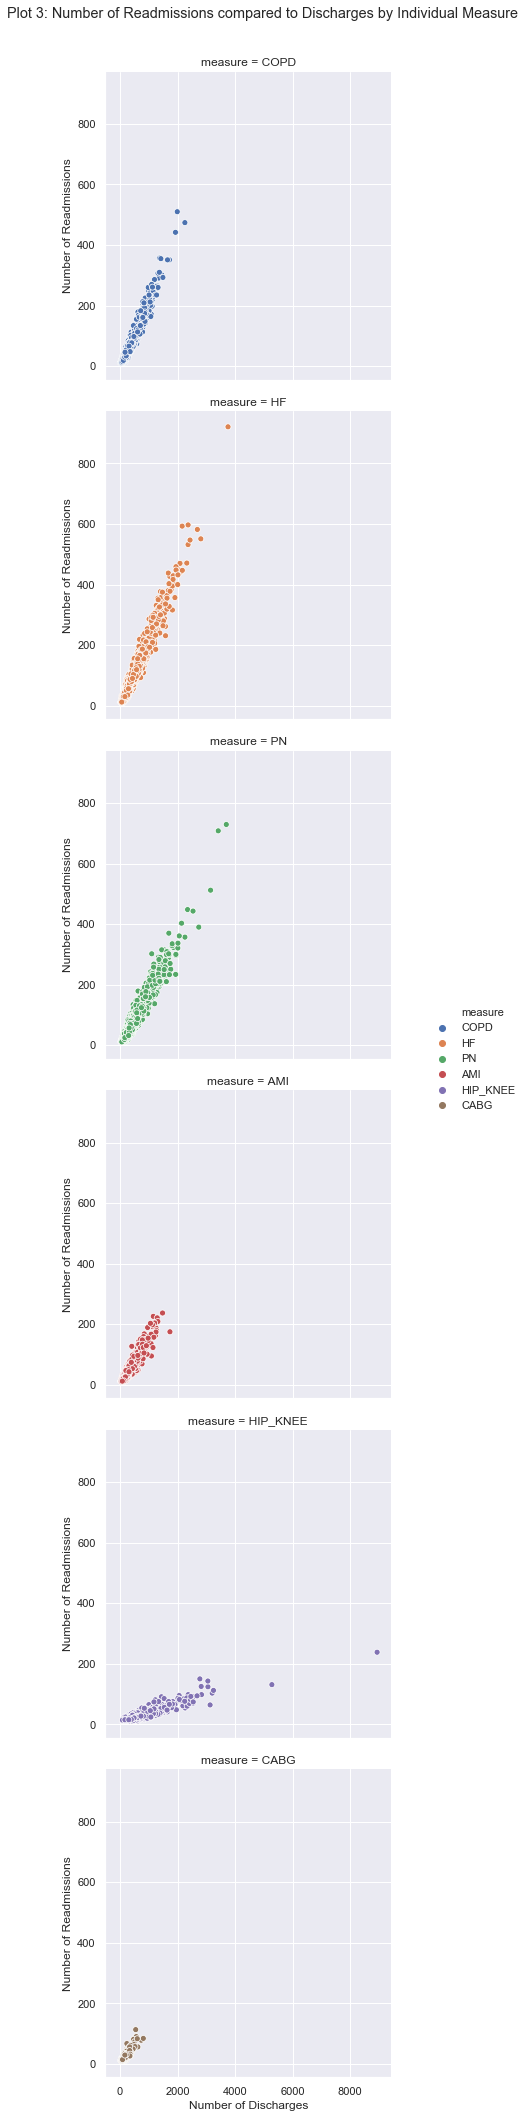

In [56]:
sns.relplot(x='Number of Discharges', y='Number of Readmissions',    
            legend='full', row = 'measure', hue = 'measure',data=df_readmin)
plt.subplots_adjust(top=0.95)
plt.suptitle('Plot 3: Number of Readmissions compared to Discharges by Individual Measure')
plt.show()

###### Pros & Cons
Plot 3: Readmissions compared to Discharges by Individual Measure
**Pros:** individual measures are easier to see in detail; scales are more detailed for each measure
**Cons:** multiple plots

###### Choose one continuous variable and one categorical variable, and plot them six different ways.
Plotting 'measure' and 'Excess Readmission Ratio'

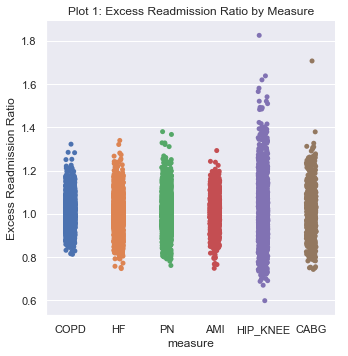

In [37]:
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=df_readmin)
plt.title('Plot 1: Excess Readmission Ratio by Measure')
plt.show()

###### Pros & Cons
Plot 1: Excess Readmission Ratio by Measure
**Pros:** effective visualization of small relatively small variance for each measure; y_scale is detailed
**Cons:** no detail on variance for each measure

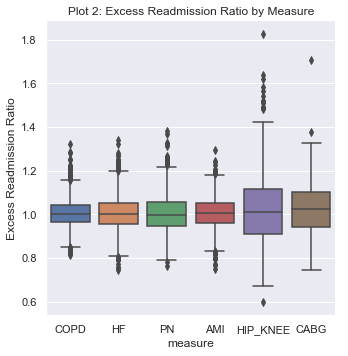

In [38]:
sns.catplot(x='measure', y='Excess Readmission Ratio', 
            data=df_readmin, kind = 'box')
plt.title('Plot 2: Excess Readmission Ratio by Measure')
plt.show()

###### Pros & Cons
Plot 2: Excess Readmission Ratio by Measure (catplot/box)
**Pros:** very effective/detailed visualization of variance and outliers for each measure; y_scale is detailed

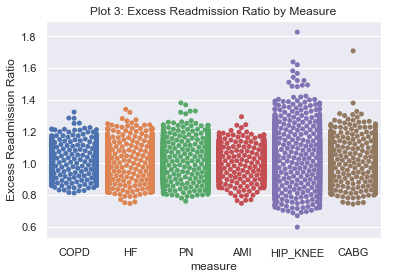

In [39]:
sns.swarmplot(x= 'measure', y= 'Excess Readmission Ratio', 
              data=df_readmin)
plt.title('Plot 3: Excess Readmission Ratio by Measure')
plt.show()

###### Pros & Cons
Plot 3: Excess Readmission Ratio by Measure (swarm)
**Pros:** effective visualization of small relatively small variance for each measure; more effective than Plot 1; y_scale is detailed
**Cons:** less effective than Plot 2 regarding details on variance for each measure

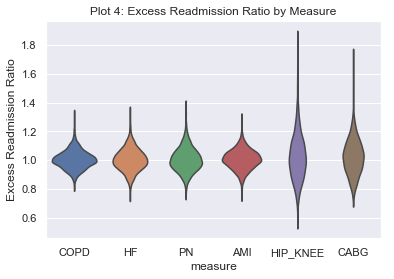

In [42]:
sns.violinplot(x= 'measure', y= 'Excess Readmission Ratio', 
               data=df_readmin, inner=None)
plt.title('Plot 4: Excess Readmission Ratio by Measure')
plt.show()

###### Pros & Cons
Plot 4: Excess Readmission Ratio by Measure (violin)
**Pros:** effective visualization of small relatively small variance for each measure; more effective than Plot 1 or 3 regarding number of values at each ratio point; interesting visual; y_scale is detailed
**Cons:** less precise than Plot 2 regarding details on variance for each measure

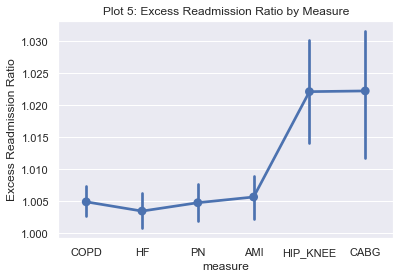

In [58]:
sns.pointplot(x= 'measure', y= 'Excess Readmission Ratio', 
              data=df_readmin)
plt.title('Plot 5: Excess Readmission Ratio by Measure')
plt.show()

###### Pros & Cons
Plot 5: Excess Readmission Ratio by Measure (pointplot)
**Pros:** effective visualization of variance for each measure; interesting visual; y_scale is detailed
**Cons:** loss of visualization of outliers; less precise than Plot 2 regarding details on variance and concentration of data points for each measure

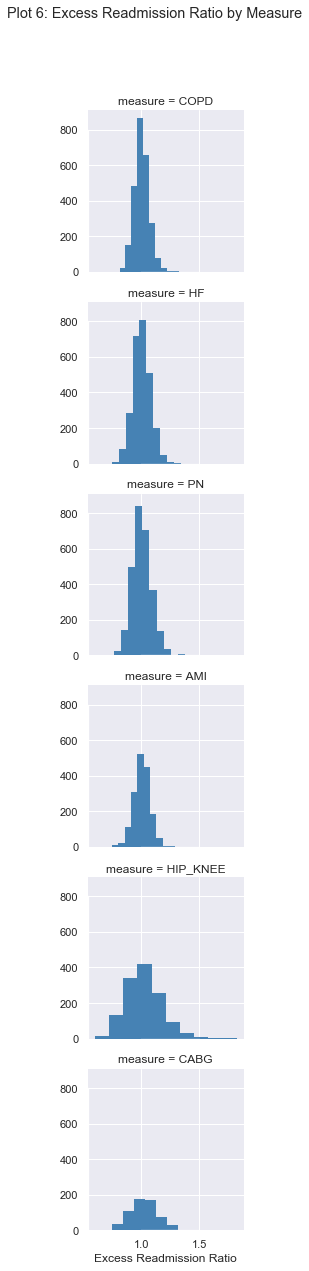

In [41]:
p = sns.FacetGrid(df_readmin, row= 'measure')

p.map(plt.hist, 'Excess Readmission Ratio', color= "steelblue",  lw=0)
plt.subplots_adjust(top=0.9)
#p.set_axis_labels('')
plt.suptitle('Plot 6: Excess Readmission Ratio by Measure')

sns.despine(trim=True)
plt.show()

###### Pros & Cons
Plot 6 Excess Readmission Ratio by Measure (individual histograms)
**Pros:** effective visualization of variance and count for each measure; more effective than Plot 1 or 3 regarding number of values at each ratio point; common, well-known visual; 
**Cons:** less interesting visual than Plot 2; multiple plots make comparison more difficult